In [27]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

myfont=FontProperties(fname=r'C:\Windows\Fonts\微軟正黑體.ttf',size=40)
sns.set(style="whitegrid", font="微軟正黑體")

In [28]:
'''load data'''

df = pd.read_csv(r"C:\Users\Andy\Desktop\洪災\dataset\FimaNfipClaims.csv")
CPI = pd.read_excel(r"C:\Users\Andy\Desktop\洪災\dataset\CPIAUCSL.xls")
# NOAA = pd.read_excel(r"C:\Users\Andy\Desktop\洪災\dataset\NOAA墨西哥灣災害事件_new.xlsx")
NOAA = pd.read_excel(r"C:\Users\Andy\Desktop\洪災\dataset\NOAA墨西哥灣災害事件_全美.xlsx")

single_event_time = NOAA[["開始日期", "結束日期"]]
CPI = CPI.set_index("observation_date")

In [29]:
''' preprocessing '''

# options = ["LA","TX","MS","AL","FL"]
# GULF_COAST = df[df["state"].isin(options)]

GULF_COAST = df
GULF_COAST = GULF_COAST.sort_values(by=["dateOfLoss"])
GULF_COAST.dateOfLoss = pd.to_datetime(GULF_COAST['dateOfLoss']).dt.date
totalAmountPaid = abs(GULF_COAST[["amountPaidOnBuildingClaim"]].replace(np.nan, 0).values) \
    + abs(GULF_COAST[["amountPaidOnContentsClaim"]].replace(np.nan, 0).values) \
    + abs(GULF_COAST[["amountPaidOnIncreasedCostOfComplianceClaim"]].replace(np.nan, 0).values)

new_GULF_COAST = pd.DataFrame({"dateOfLoss":GULF_COAST.dateOfLoss.values,"totalAmountPaid":totalAmountPaid.flatten().tolist()})
new_GULF_COAST = new_GULF_COAST.dropna().set_index("dateOfLoss")

In [30]:
# abs(GULF_COAST[["amountPaidOnBuildingClaim"]].values).flatten()

In [31]:
start_time = single_event_time.iloc[:,0].tolist()
end_time = single_event_time.iloc[:,1].tolist()

sumAmount = []
for i, j in zip(start_time,end_time):
    a, b = pd.to_datetime(i).date(), pd.to_datetime(j).date()
    sumAmount.append(sum(new_GULF_COAST[a:b].totalAmountPaid.values))

single_event_time["sumAmount"] = sumAmount
event = single_event_time[["結束日期","sumAmount"]].set_index("結束日期").sort_index()

In [24]:
''' actually this is BMM method '''

I_t = []

for i in range(1980,2020):
    ''' mask the time of event and CPI '''
    start_time = pd.to_datetime(str(i)+"-01-01").date()
    end_time = pd.to_datetime(str(i)+"-12-31").date()
    masked_event = event.loc[start_time:end_time]
    masked_CPI = CPI.loc[start_time:end_time]

    ''' get max value '''
    value_max_loss = np.max(masked_event["sumAmount"])

    try:
        time_max_loss = np.argmax(masked_event["sumAmount"])
    except ValueError:
        pass
   
    # print(time_max_loss)
    ''' get CPI '''
    CPI_for_adjust = masked_CPI.iloc[time_max_loss.month].tolist()[0]

    ''' CPI adjust '''
    I_t.append(value_max_loss*100/CPI_for_adjust)

In [26]:
# I_t
I_t_data = pd.DataFrame({"year":list(range(1980,2020)),"CPI-adjusted I_t":I_t})
I_t_data.to_excel(r"C:\Users\Andy\Desktop\洪災\dataset\I_t_data_20210107_ver3.xlsx")

# Plot

In [12]:
from pyextremes import EVA

In [130]:
''' preprocessing '''

options = ["LA","TX","MS","AL","FL"]
GULF_COAST = df[df["state"].isin(options)]

# GULF_COAST = df
GULF_COAST = GULF_COAST.sort_values(by=["dateOfLoss"])
GULF_COAST.dateOfLoss = pd.to_datetime(GULF_COAST['dateOfLoss'])

series_1 = GULF_COAST.dateOfLoss.tolist()
series_2 = pd.Series(totalAmountPaid.flatten().tolist(), index= series_1)
# print(series_2) 
data = series_2

In [32]:
# GULF_COAST.dateOfLoss
data

NameError: name 'data' is not defined

In [133]:
model = EVA(data=data)
# model
model.get_extremes(method='BM', block_size='1Y', extremes_type='high', errors='raise')

ValueError: setting an array element with a sequence.

In [ ]:
model.plot_extremes()

(<Figure size 768x768 with 4 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x24919954be0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x24919767ba8>))

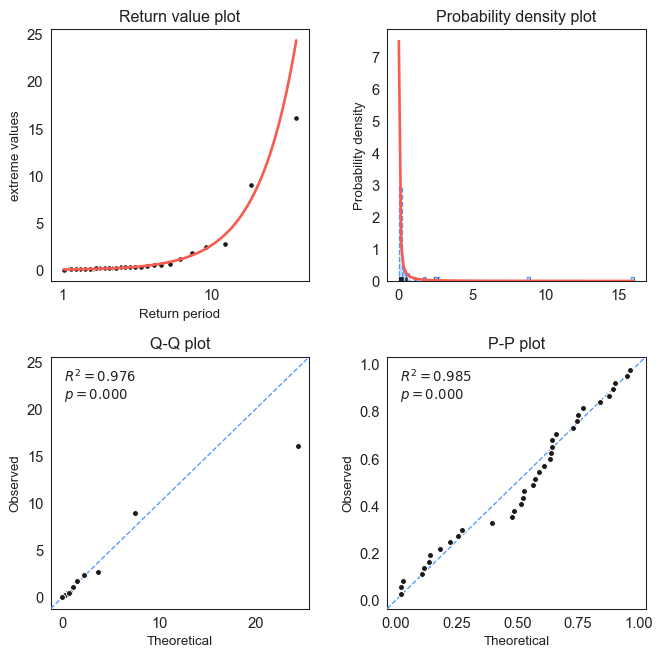

In [84]:
model.plot_diagnostic()